# 대중교통 데이터 프로젝트
## 대중교통 비용 데이터 시각화 하기

In [1]:
# 데이터는 티머니에서 제공하는 대중교통 비용에 대한 통계자료로, '지하철 유무임별 이용현황'을 이용
# 데이터 확인하기
import csv
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

for row in data:
    for i in range(4, 8):
        row[i]= int(row[i])
    print(row)


['2021-01', '1호선', '1', '서울역', 731660, 678117, 127534, 118937]
['2021-01', '1호선', '10', '동묘앞', 98645, 105308, 113919, 115644]
['2021-01', '1호선', '2', '시청', 371942, 366139, 46231, 43433]
['2021-01', '1호선', '3', '종각', 598363, 567563, 84544, 78565]
['2021-01', '1호선', '4', '종로3가', 313943, 281737, 187603, 175431]
['2021-01', '1호선', '5', '종로5가', 292654, 292561, 174460, 166963]
['2021-01', '1호선', '6', '동대문', 168863, 158577, 84638, 83489]
['2021-01', '1호선', '7', '신설동', 219283, 218343, 82995, 79139]
['2021-01', '1호선', '8', '제기동', 195353, 192588, 204956, 219996]
['2021-01', '1호선', '9', '청량리(서울시립대입구)', 266539, 264050, 205089, 206452]
['2021-01', '2호선', '11', '시청', 432828, 412117, 34283, 29974]
['2021-01', '2호선', '12', '을지로입구', 739976, 744333, 66638, 62076]
['2021-01', '2호선', '13', '을지로3가', 373645, 363847, 51829, 49872]
['2021-01', '2호선', '14', '을지로4가', 205245, 201486, 73038, 72596]
['2021-01', '2호선', '15', '동대문역사문화공원(DDP)', 209129, 235813, 36571, 37954]
['2021-01', '2호선', '16', '신당', 239931, 2497

### 유임 승차 비율이 높은 역 확인하기
* 유임승차 비율 = 유임승차 인원 / 무임승차 인원
* 모든 역의 데이터를 바탕으로 1) 각 역의 유임승차 비율을 계산한 후, 2) 비율이 가장 높은 역을 찾아 3) 출력할 것.

In [2]:
# 무임승차인원에 0이 존재
"""
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

mx=0
rate=0

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    rate=row[4]/row[6]
    if rate > mx :
        mx = rate
print(mx)
"""

"\nf=open('subwayfee.csv')\ndata=csv.reader(f)\nnext(data)\n\nmx=0\nrate=0\n\nfor row in data:\n    for i in range(4,8):\n        row[i]=int(row[i])\n    rate=row[4]/row[6]\n    if rate > mx :\n        mx = rate\nprint(mx)\n"

In [3]:
# 무임승차인원에 0이 존재
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

mx=0
rate=0

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    if row[6] != 0 : # row[6]이 0이 아니라는 조건 추가
        rate=row[4]/row[6]
        if rate > mx : # rate값이 mx보다 크다면
            mx = rate # rate값을 mx값으로 업데이트 하기
            print(row, round(rate,2)) #업데이트 된 값 출력하기


['2021-01', '1호선', '1', '서울역', 731660, 678117, 127534, 118937] 5.74
['2021-01', '1호선', '2', '시청', 371942, 366139, 46231, 43433] 8.05
['2021-01', '2호선', '11', '시청', 432828, 412117, 34283, 29974] 12.63
['2021-01', '2호선', '19', '한양대', 129871, 132547, 8498, 8676] 15.28
['2021-01', '2호선', '49', '홍대입구', 1000621, 1034537, 63651, 60858] 15.72
['2021-01', '경부선', '121', '서울역', 102009, 31498, 5341, 1367] 19.1


In [4]:
# 2021년 1월 데이터에는 안 그렇지만,
# 교재의 경우, 충무료역의 유/무임하차 값이 모두 0
# 환승역이라 오류가 생긴 듯.
# 그래서 유임 승차 비율 식을 변경
# rate=유임승차인원/전체(유임+무임)인원
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

mx=0
rate=0

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    if row[6] != 0 : 
        rate=row[4]/ (row[4]+row[6])
        if rate > mx : 
            mx = rate 
            print(row, round(rate,2)) 

['2021-01', '1호선', '1', '서울역', 731660, 678117, 127534, 118937] 0.85
['2021-01', '1호선', '2', '시청', 371942, 366139, 46231, 43433] 0.89
['2021-01', '2호선', '11', '시청', 432828, 412117, 34283, 29974] 0.93
['2021-01', '2호선', '19', '한양대', 129871, 132547, 8498, 8676] 0.94
['2021-01', '2호선', '49', '홍대입구', 1000621, 1034537, 63651, 60858] 0.94
['2021-01', '경부선', '121', '서울역', 102009, 31498, 5341, 1367] 0.95


In [5]:
# 2021년 1월 데이터에는 안 그렇지만,
# 교재의 경우, 충무료역의 유/무임하차 값이 모두 0
# 환승역이라 오류가 생긴 듯.
# 그래서 유임 승차 비율 식을 변경
# rate=유임승차인원/전체(유임+무임)인원
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

mx=0
rate=0

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    if row[6] != 0 : 
        rate=row[4]/ (row[4]+row[6])
        if rate > 0.94 : #유임승차 비율이 0.94 초과하는 데이터라면
            mx = rate 
            print(row, round(rate,2)) 

['2021-01', '2호선', '49', '홍대입구', 1000621, 1034537, 63651, 60858] 0.94
['2021-01', '경부선', '121', '서울역', 102009, 31498, 5341, 1367] 0.95
['2021-01', '경원선', '131', '옥수', 1040, 669, 61, 55] 0.94
['2021-01', '9호선', '616', '여의도', 456918, 435503, 28847, 26631] 0.94
['2021-01', '공항철도 1호선', '643', '디지털미디어시티', 262910, 233827, 15303, 14382] 0.94
['2021-01', '공항철도 1호선', '644', '마곡나루(서울식물원)', 139676, 133259, 7376, 7104] 0.95
['2021-01', '공항철도 1호선', '645', '김포공항', 208250, 122793, 13053, 9137] 0.94
['2021-01', '공항철도 1호선', '648', '청라국제도시', 129360, 121701, 7321, 7000] 0.95


In [6]:
# 유임 승차 비율이 가장 높은 역 찾기 위해
# 1) mx_station 변수를 빈 문자열로 초기화한 다음, 2) 역 이름(row[3])과 호선(row[1]) 출력하기

f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

mx=0
rate=0
mx_station=''

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    if row[6] != 0 and (row[4]+row[6]) > 100000 : 
        rate=row[4]/ (row[4]+row[6])
        if rate > mx :
            mx = rate
            mx_station = row[3] + ' ' + row[1]
            
print(mx_station, round(mx*100,2)) 

서울역 경부선 95.02


### 유무임 승하차 인원이 가장 많은 역 찾기
* 1) 데이터를 읽은 뒤, 2) 유임 승/하차, 무임 승/하차 인원이 가장 많은 역을 찾아 3) 출력

In [7]:
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

mx=[0]*4 # 초기화된 리스트 4개 생성
mx_station=['']*4 # 초기화된 리스트 4개 생성
label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data :
    for i in range(4,8) :
        row[i]= int(row[i])
        if row[i] > mx[i-4] :
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]
            
for i in range(4) :
    print(label[i]+' : '+mx_station[i], mx[i])

유임승차 : 강남 2호선 1614913
유임하차 : 강남 2호선 1568467
무임승차 : 청량리(서울시립대입구) 1호선 205089
무임하차 : 제기동 1호선 219996


### 유무임 승하차 비율 시각화 하기

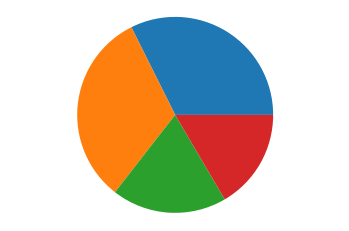

In [8]:
import matplotlib.pyplot as plt

f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])

plt.pie(row[4:8])
plt.axis('equal')
plt.show()

* 어떤 역에 대한 차트인지 정보가 부족.
* 비율을 수치로 정확하게 나타났으면 좋겠음

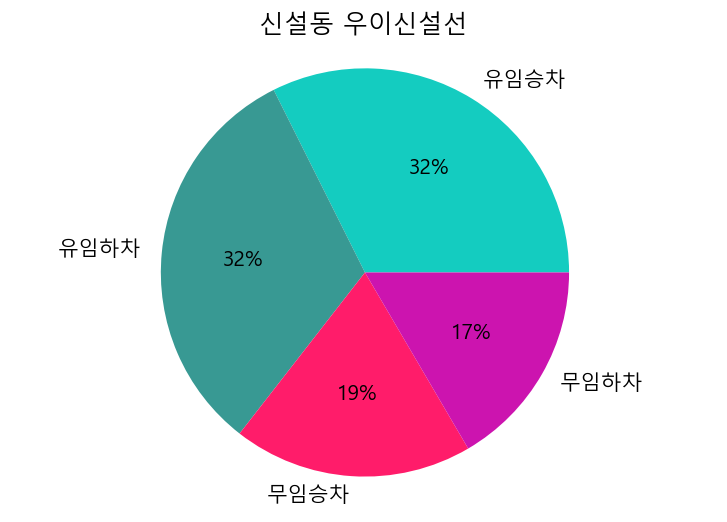

In [9]:
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

c=['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
plt.rc('font', family='Malgun Gothic')

label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])

plt.figure(dpi=150)
plt.title(row[3]+' '+row[1])
plt.pie(row[4:8], labels=label, colors=c, autopct='%1.f%%')
plt.axis('equal')
plt.show()

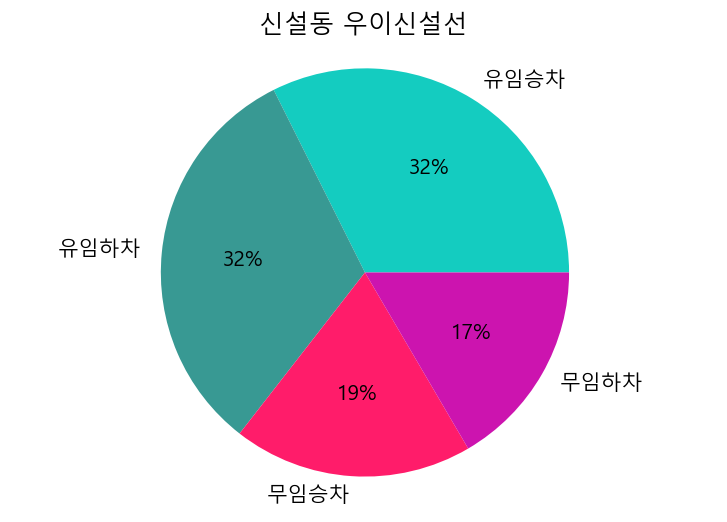

In [10]:
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

c=['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
plt.rc('font', family='Malgun Gothic')

label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])

plt.figure(dpi=150)
plt.title(row[3]+' '+row[1])
plt.pie(row[4:8], labels=label, colors=c, autopct='%1.f%%')
plt.axis('equal')
plt.savefig(row[3]+' '+row[1]+'.png')
plt.show()

## 지하철 시간대별 데이터 시각화 하기
### 데이터 정제하기

In [11]:
f=open('subwaytime.csv')
data=csv.reader(f)
for row in data:
    print(row)

[' 사용월 ', ' 호선명 ', ' 역ID ', ' 지하철역 ', ' 04:00:00~04:59:59 ', '  ', ' 05:00:00~05:59:59 ', '  ', ' 06:00:00~06:59:59 ', '  ', ' 07:00:00~07:59:59 ', '  ', ' 08:00:00~08:59:59 ', '  ', ' 09:00:00~09:59:59 ', '  ', ' 10:00:00~10:59:59 ', '  ', ' 11:00:00~11:59:59 ', '  ', ' 12:00:00~12:59:59 ', '  ', ' 13:00:00~13:59:59 ', '  ', ' 14:00:00~14:59:59 ', '  ', ' 15:00:00~15:59:59 ', '  ', ' 16:00:00~16:59:59 ', '  ', ' 17:00:00~17:59:59 ', '  ', ' 18:00:00~18:59:59 ', '  ', ' 19:00:00~19:59:59 ', '  ', ' 20:00:00~20:59:59 ', '  ', ' 21:00:00~21:59:59 ', '  ', ' 22:00:00~22:59:59 ', '  ', ' 23:00:00~23:59:59 ', '  ', ' 00:00:00~00:59:59 ', '  ', ' 01:00:00~01:59:59 ', '  ', ' 02:00:00~02:59:59 ', '  ', ' 03:00:00~03:59:59 ', '  ']
['  ', '  ', '  ', '  ', ' 승차 ', ' 하차 ', ' 승차 ', ' 하차 ', ' 승차 ', ' 하차 ', ' 승차 ', ' 하차 ', ' 승차 ', ' 하차 ', ' 승차 ', ' 하차 ', ' 승차 ', ' 하차 ', ' 승차 ', ' 하차 ', ' 승차 ', ' 하차 ', ' 승차 ', ' 하차 ', ' 승차 ', ' 하차 ', ' 승차 ', ' 하차 ', ' 승차 ', ' 하차 ', ' 승차 ', ' 하차 ', ' 승차 ', ' 하차 ', '

In [12]:
f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

for row in data:
    row[4:]=map(int, row[4:])
    print(row)

[' 2021-01 ', ' 1호선 ', '1', ' 서울역 ', 445, 8, 6832, 4781, 8835, 24937, 27116, 66431, 43277, 145325, 31927, 91672, 29589, 44874, 35644, 36552, 43336, 38972, 44588, 39053, 40502, 37105, 50240, 38482, 58078, 39890, 93883, 45769, 144127, 50873, 72171, 34653, 49654, 23324, 51601, 22013, 20790, 8189, 6527, 3751, 32, 398, 0, 2, 0, 0, 0, 0]
[' 2021-01 ', ' 1호선 ', '10', ' 동묘앞 ', 78, 2, 2391, 738, 2761, 3527, 4457, 5734, 6977, 14687, 5588, 13409, 6386, 14013, 9706, 19323, 14318, 23997, 19975, 27026, 25755, 26641, 28426, 21195, 27605, 14522, 23169, 10057, 16419, 7615, 6999, 5208, 4789, 3885, 4265, 4664, 1982, 2495, 517, 1502, 1, 704, 0, 8, 0, 0, 0, 0]
[' 2021-01 ', ' 1호선 ', '2', ' 시청 ', 18, 1, 1489, 2990, 2235, 14570, 4971, 47793, 6119, 131340, 6335, 62133, 7012, 23760, 10198, 19942, 11459, 17031, 13648, 17361, 18213, 15206, 24043, 12769, 27737, 10571, 55134, 10643, 108895, 9871, 41170, 4716, 34710, 3216, 33243, 3675, 9286, 1306, 2254, 629, 4, 48, 0, 1, 0, 0, 0, 0]
[' 2021-01 ', ' 1호선 ', '3', ' 종각

[' 2021-01 ', ' 9호선 ', '621', ' 동작(현충원) ', 15, 0, 854, 190, 1249, 1209, 3923, 1240, 5077, 2139, 2875, 1411, 1892, 1043, 1798, 1080, 1741, 1020, 1761, 1178, 1846, 1434, 1745, 1315, 2310, 1376, 2175, 2208, 3111, 3672, 1546, 2738, 1216, 1550, 1216, 2189, 639, 911, 160, 489, 0, 122, 0, 0, 0, 0, 0, 0]
[' 2021-01 ', ' 9호선 ', '622', ' 구반포 ', 2, 0, 388, 202, 1463, 1385, 3512, 2827, 4854, 6387, 3369, 4314, 2461, 3027, 2380, 3022, 2971, 3298, 3327, 3635, 3522, 3341, 3693, 3466, 4162, 3628, 5299, 4399, 7553, 6304, 3643, 4505, 3127, 2684, 3132, 3632, 913, 1533, 205, 835, 0, 17, 0, 0, 0, 0, 0, 0]
[' 2021-01 ', ' 9호선 ', '623', ' 신반포 ', 0, 0, 287, 444, 1605, 5211, 4295, 4506, 5746, 7156, 3469, 4775, 2510, 2962, 2579, 2371, 2929, 2618, 3336, 3264, 3177, 2835, 4402, 3084, 6596, 3055, 8004, 3983, 7069, 6164, 3899, 4276, 2526, 2610, 2534, 3795, 894, 1364, 230, 791, 0, 0, 0, 0, 0, 0, 0, 0]
[' 2021-01 ', ' 9호선 ', '624', ' 고속터미널 ', 7, 0, 1505, 1064, 3772, 9581, 11358, 12522, 15522, 20029, 10963, 20608, 8692

### 출근 시간대 사람들이 가장 많이 타고 내리는 역 확인하기
* 시간은 7시, 10번 인덱스에 저장

In [13]:
f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

result=[]

for row in data:
    row[4:]=map(int, row[4:])
    result.append(row[10])
print(len(result))
print(result)

604
[27116, 4457, 4971, 4413, 3297, 3473, 10340, 13739, 15914, 28669, 4133, 6057, 3943, 2485, 5189, 20250, 29794, 19635, 3863, 14571, 18452, 41543, 52867, 62162, 28888, 88048, 41020, 12738, 11858, 16420, 11073, 29652, 18684, 10989, 17787, 56743, 61348, 99513, 64508, 169189, 71291, 111142, 52499, 103882, 33418, 31770, 35071, 34216, 44933, 25098, 15255, 21410, 12220, 5301, 4774, 2578, 2520, 25530, 36642, 3803, 12683, 65828, 106281, 38787, 49459, 46507, 11281, 11415, 10007, 4439, 1261, 1506, 3, 4100, 18073, 20854, 16895, 12044, 7983, 8546, 18580, 5786, 20208, 26599, 12075, 6538, 18502, 2642, 19919, 16769, 25492, 14864, 17317, 19262, 89612, 38820, 75130, 64325, 35179, 24268, 13169, 4008, 4856, 5773, 2337, 3537, 9222, 12183, 3863, 7943, 9340, 3213, 36387, 50562, 1737, 40628, 71436, 44227, 74272, 101218, 5998, 8981, 13704, 12201, 22329, 28375, 6947, 19189, 29728, 11061, 36624, 32034, 26187, 65487, 20134, 63209, 14587, 24626, 53619, 31268, 57569, 31000, 11013, 35626, 6856, 7887, 16243, 1812, 

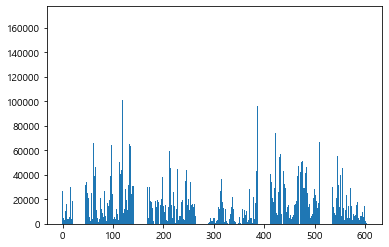

In [14]:
import matplotlib.pyplot as plt
plt.bar(range(len(result)), result)
plt.show()

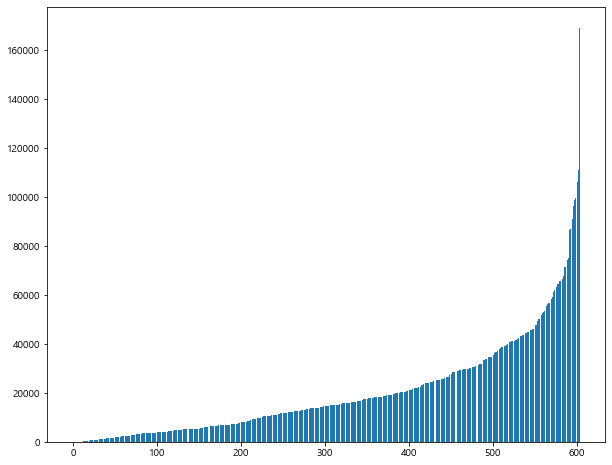

In [15]:
import matplotlib.pyplot as plt
result.sort() # result 데이터를 오름차순으로 정렬
plt.figure(figsize=(10,8))
plt.bar(range(len(result)), result)
plt.show()

In [16]:
import csv
f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

result1=[]

for row in data:
    row[4:]=map(int, row[4:])
    result1.append(sum(row[10:15:2]))
print(len(result))

604


In [17]:
# 출근시간대 사람들이 많이 타는 역
import csv
f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

mx=0
mx_station=''

for row in data :
    row[4:] = map(int, row[4:])
    if sum(row[10:15:2]) > mx :
        mx = sum(row[10:15:2])
        mx_station = row[3] + '(' + row[1] + ')'
print(mx_station, mx)

 신림 ( 2호선 ) 581326


In [18]:
# 출근시간대 사람들이 많이 내리는 역

import csv
f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

mx=0
mx_station=''

for row in data :
    row[4:] = map(int, row[4:])
    if sum(row[11:16:2]) > mx :
        mx = sum(row[10:15:2])
        mx_station = row[3] + '(' + row[1] + ')'
print(mx_station, mx)

 석촌고분 ( 9호선2~3단계 ) 45846


### 밤 11시에 사람들이 가장 많이 타는 역 찾기

In [19]:
f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

mx=0
mx_st = ''
t=int(input('몇 시의 인원이 가장 많은 역이 궁금하세요? : '))

for row in data :
    row[4:]=map(int, row[4:])
    a = row[4+(t-4)*2] # 입력한 데이터를 기반으로 승차인원 값 추출
    if a > mx :
        mx=a
        mx_st = row[3] + '(' + row[1] + ')'

print(mx_st, mx)        

몇 시의 인원이 가장 많은 역이 궁금하세요? : 23
 강남 ( 2호선 ) 11496


### 시간대별 사람들이 가장 많이 타고 내리는 역 찾기
* 24시간 전체에 대한 반복문 및 시간별 데이터를 저장할 리스트 필요
* range() 함수와 변수 j 이용
* 변수 j는 0부터 시작하고 데이터 인덱스는 4부터 시작
* j=0 인덱스=4, j=1 인덱스=5, j=2 인덱스=6
* -> i=j*2+4

In [20]:
f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

mx=[0]*24
mx_st=['']*24

for row in data :
    row[4:]=map(int, row[4:])
    for j in range(24) :
        a = row[j*2+4]
        if a > mx[j] :
            mx[j] = a
            mx_st[j] = row[3]+'('+str(j+4)+'시)'
print(mx_st)
print(mx)

[' 구로 (4시)', ' 신림 (5시)', ' 신림 (6시)', ' 신림 (7시)', ' 신림 (8시)', ' 신림 (9시)', ' 신림 (10시)', ' 신림 (11시)', ' 신림 (12시)', ' 강남 (13시)', ' 강남 (14시)', ' 강남 (15시)', ' 강남 (16시)', ' 강남 (17시)', ' 가산디지털단지 (18시)', ' 강남 (19시)', ' 강남 (20시)', ' 강남 (21시)', ' 강남 (22시)', ' 강남 (23시)', ' 부평 (24시)', ' 병점 (25시)', ' 고속터미널 (26시)', '']
[7312, 32431, 62867, 169189, 259505, 152632, 76710, 64159, 66910, 74938, 86107, 111104, 125759, 190350, 283331, 177478, 159575, 189419, 43747, 11496, 496, 3, 5, 0]


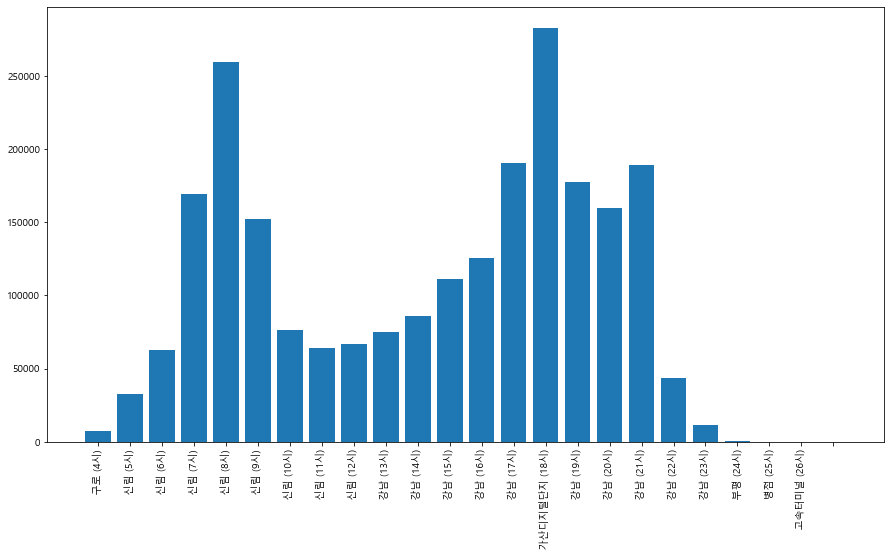

In [21]:
plt.rc('font', family="Malgun Gothic")
plt.figure(figsize=(15,8))
plt.bar(range(24), mx)
plt.xticks(range(24), mx_st, rotation=90)
plt.show()

### 시간대별 승하차 인원 더해보기
* 모든 역에 대해 시간대별 승/하차 인원을 더한 누적 데이터 확인하기
* 이 데이터를 시각화 하기

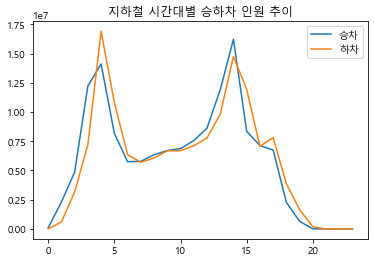

In [23]:
# y축 옆 1e7=1*10의7승
f=open('subwaytime.csv')
data=csv.reader(f)
next(data)
next(data)

s_in = [0]*24 # 시간대별 승차 인원 리스트
s_out = [0]*24 # 시간대별 하차 인원 리스트

for row in data:
    row[4:] =map(int, row[4:])
    for i in range(24) :
        s_in[i] += row[4+i*2]
        s_out[i] += row[5+i*2]

plt.rc('font', family='Malgun Gothic')
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in, label='승차')
plt.plot(s_out, label='하차')
plt.legend()
plt.show()
